# Task 7.1

In [3]:
import pandas as pd


df1=pd.read_csv('year 2019.csv')
df2=pd.read_csv('year 2020.csv')

data = pd.concat([df1, df2]).drop_duplicates()
dataclean = data.dropna(axis='index',how='any', subset=['INCIDENT_NUMBER', 'OFFENSE_CODE', 'DISTRICT', 'Long', 'Lat', 'SHOOTING', 'OCCURRED_ON_DATE'])

C:\Users\dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
dataclean.to_csv('saved_data_exercise7.csv')

In [4]:
dataclean["crime_type"] = ""
dataclean['crime_type'].loc[(dataclean['OFFENSE_DESCRIPTION'].str.contains('assault|robbery|rape',case=False))]='Violent crimes'
dataclean['crime_type'].loc[(dataclean['OFFENSE_DESCRIPTION'].str.contains('burglary|larceny|theft|arson',case=False))]='Property crimes'

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guid

In [5]:
dataclean_2019 = dataclean.loc[dataclean['OCCURRED_ON_DATE'].str.contains('2019')]
dataclean_2020 = dataclean.loc[dataclean['OCCURRED_ON_DATE'].str.contains('2020')]
dataclean_Violent_2019=dataclean_2019.loc[dataclean_2019['crime_type'].str.contains('Violent')]
dataclean_Violent_2020=dataclean_2020.loc[dataclean_2020['crime_type'].str.contains('Violent')]
dataclean_Property_2019=dataclean_2019.loc[dataclean_2019['crime_type'].str.contains('Property')]
dataclean_Property_2020=dataclean_2020.loc[dataclean_2020['crime_type'].str.contains('Property')]

In [6]:
print('the total number of Violent crime in 2019 is :',len(dataclean_Violent_2019))
print('the total number of Violent crime in 2020 is :',len(dataclean_Violent_2020))
print('the total number of Property crime in 2019 is:',len(dataclean_Property_2019))
print('the total number of Property crime in 2020 is:',len(dataclean_Property_2020))

the total number of Violent crime in 2019 is : 8324
the total number of Violent crime in 2020 is : 5152
the total number of Property crime in 2019 is: 13158
the total number of Property crime in 2020 is: 12227


#  Task 7.2

In [13]:
import matplotlib.pyplot as plt

In [12]:
y_2019=dataclean_Violent_2019.groupby('DISTRICT')['crime_type'].count().reset_index()
x_2019=dataclean_Property_2019.groupby('DISTRICT')['crime_type'].count().reset_index()
y_2020=dataclean_Violent_2020.groupby('DISTRICT')['crime_type'].count().reset_index()
x_2020=dataclean_Property_2020.groupby('DISTRICT')['crime_type'].count().reset_index()

Text(0, 0.5, 'annual violent crimes')

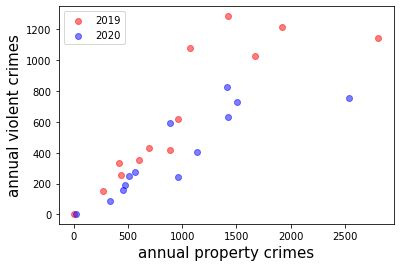

In [14]:
plt.scatter(x_2019["crime_type"],y_2019["crime_type"],c="r",alpha=0.5,label="2019") 
plt.scatter(x_2020["crime_type"],y_2020["crime_type"],c="b",alpha=0.5,label="2020")
plt.legend(loc="best")
plt.xlabel('annual property crimes',fontsize=15)
plt.ylabel('annual violent crimes',fontsize=15)

# Task 7.3

In [15]:
dataclean_2019_sum = pd.DataFrame()
dataclean_2019_sum['district']=x_2019['DISTRICT']
dataclean_2019_sum['crime number']=x_2019['crime_type']+y_2019['crime_type']
dataclean_2020_sum = pd.DataFrame()
dataclean_2020_sum['district']=x_2020['DISTRICT']
dataclean_2020_sum['crime number']=x_2020['crime_type']+y_2020['crime_type']

Text(0, 0.5, 'annual sums')

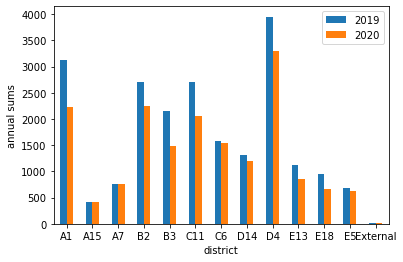

In [17]:
df = pd.DataFrame({'2019': list(dataclean_2019_sum['crime number']), '2020': list(dataclean_2020_sum['crime number'])}, index=dataclean_2020_sum['district'])
ax = df.plot.bar(rot=0)
plt.ylabel('annual sums')

# Task 7.4

In [7]:
dataclean_shooting_2019=dataclean_2019.loc[dataclean_2019['SHOOTING']== 1]
dataclean_shooting_2020=dataclean_2020.loc[dataclean_2020['SHOOTING']== 1]

In [8]:
_2019_1quarter=dataclean_shooting_2019[dataclean_shooting_2019['MONTH']<=3].groupby(['DISTRICT'])['SHOOTING'].sum()
_2019_2quarter=dataclean_shooting_2019[dataclean_shooting_2019['MONTH'].apply(lambda x:  x in [4,5,6]) ].groupby(['DISTRICT'])['SHOOTING'].sum()
_2019_3quarter=dataclean_shooting_2019[dataclean_shooting_2019['MONTH'].apply(lambda x:  x in [7,8,9]) ].groupby(['DISTRICT'])['SHOOTING'].sum()
_2019_4quarter=dataclean_shooting_2019[dataclean_shooting_2019['MONTH'].apply(lambda x:  x in [10,11,12]) ].groupby(['DISTRICT'])['SHOOTING'].sum()
_2020_1quarter=dataclean_shooting_2020[dataclean_shooting_2020['MONTH']<=3].groupby(['DISTRICT'])['SHOOTING'].sum()
_2020_2quarter=dataclean_shooting_2020[dataclean_shooting_2020['MONTH'].apply(lambda x:  x in [4,5,6]) ].groupby(['DISTRICT'])['SHOOTING'].sum()
_2020_3quarter=dataclean_shooting_2020[dataclean_shooting_2020['MONTH'].apply(lambda x:  x in [7,8,9]) ].groupby(['DISTRICT'])['SHOOTING'].sum()
_2020_4quarter=dataclean_shooting_2020[dataclean_shooting_2020['MONTH'].apply(lambda x:  x in [10,11,12]) ].groupby(['DISTRICT'])['SHOOTING'].sum()

In [9]:
_2019_1quarter=pd.DataFrame(_2019_1quarter)
_2019_1quarter['QUARTER']=1
_2019_1quarter['YEAR']=2019
_2019_2quarter=pd.DataFrame(_2019_2quarter)
_2019_2quarter['QUARTER']=2
_2019_2quarter['YEAR']=2019
_2019_3quarter=pd.DataFrame(_2019_3quarter)
_2019_3quarter['QUARTER']=3
_2019_3quarter['YEAR']=2019
_2019_4quarter=pd.DataFrame(_2019_4quarter)
_2019_4quarter['QUARTER']=4
_2019_4quarter['YEAR']=2019

In [10]:
_2020_1quarter=pd.DataFrame(_2020_1quarter)
_2020_1quarter['QUARTER']=1
_2020_1quarter['YEAR']=2020
_2020_2quarter=pd.DataFrame(_2020_2quarter)
_2020_2quarter['QUARTER']=2
_2020_2quarter['YEAR']=2020
_2020_3quarter=pd.DataFrame(_2020_3quarter)
_2020_3quarter['QUARTER']=3
_2020_3quarter['YEAR']=2020
_2020_4quarter=pd.DataFrame(_2020_4quarter)
_2020_4quarter['QUARTER']=4
_2020_4quarter['YEAR']=2020

In [15]:
df=pd.concat([_2019_1quarter,_2019_2quarter,_2019_3quarter,_2019_4quarter,_2020_1quarter,_2020_2quarter,_2020_3quarter,_2020_4quarter])
df

,SHOOTING,QUARTER,YEAR
DISTRICT,,,
A7,4,1,2019
B2,33,1,2019
B3,32,1,2019
C11,28,1,2019
C6,4,1,2019
...,...,...,...
D4,5,4,2020
E13,7,4,2020
E18,18,4,2020


In [12]:
import seaborn as sns

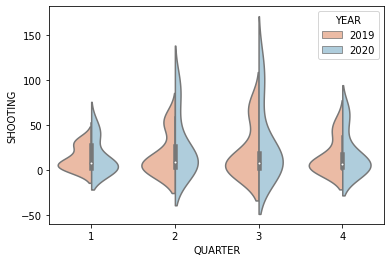

In [14]:
sns.violinplot(x=df['QUARTER'],y=df['SHOOTING'], hue=df['YEAR'],split=True, palette='RdBu')